# Anatomy

* Layers
* Input Data and Corresponding targets
* Loss Function (Feedback signal)
* Optimizer

In [1]:
from keras import layers
from keras import models 

layer = layers.Dense(32, input_shape=(784,)) #Dense layer with 32 output units
#This layer expects an input of 2D tensors where the first dimension is 784. It will only return a tensor of shape 32

c:\Users\Snowwolf\miniconda3\envs\tensf-env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32)) #Keras has automatic layer compatibility where you don't need to specify the input shape while defining the layers
#By looking at the output shape of the layer before it

* **Loss Function** - Objective function, quantity that has to be minimized during training. Measures the success of the task at hand.
* **Optimizer** - Determines how network will be updated based on the loss function. Implements a specific variant of SGD?

In [3]:
#Same network in different format -> Functional API
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation="relu")(input_tensor)
output_tensor = layers.Dense(10, activation="softmax")(x)

model = models.Model(inputs=input_tensor,
                     outputs=output_tensor)


In [10]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = "mse",
              metrics = ["accuracy"])

# Binary Classification

In [18]:
#Always use different data from datasets for training and testing 
#Prevent model from just learning the mapping between the training data only

from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=9000)

#Only keeping the top most 1200 frequently occuring words in the data

In [23]:
#data contains indices of the words -> int -> already encoded
#labels contain the label -> int

max([max(sequence) for sequence in train_data])

8999

In [43]:
#Decoding some words to english again

word_index = imdb.get_word_index()
print(list(word_index)[0:3])

reverse_index = {}
for (key, value) in word_index.items():
    reverse_index[value] = key

es = ""
for i in train_data[3]:
    word = reverse_index[i]
    es += word +" "

print("Decoded word is \t", es)

['fawn', 'tsukino', 'nunnery']
Decoded word is 	 the of and and they halfway of identity went plot actors watch of share was well these can this only and ten so failing feels only novak killer and of bill br and would find of films saw grade about hated it for br so ten remain by in of songs are of and gigantic is morality it's her or know would care i i br screen that obvious plot actors new would with paris not have attempt lead or of too would local that of every their it coming this eleven of information to and br singers movie was anxious that film is under by left this and is entertainment ok this in own be house of sticks worker in bound my i i obviously sake things just as lost lot br comes never like thing start of obviously comes indeed coming want no bad than history from lost comes accidentally young to movie bad facts dream from reason these honor movie elizabeth it's movie so fi and enough to computer duo film and almost jeffrey rarely obviously and alive to appears i i o

In [77]:
#Int cannot be fed directly to model
# -> Tensors for feeding
# Padding for same length -> max sequence length

import numpy as np

def vectorize_sequence(data_sequence, dimensions=9000):
    a = len(data_sequence)
    b = dimensions
    padding_array = np.zeros((a, b))
    for index, data_sequence_row in enumerate(data_sequence):
        padding_array[index][data_sequence_row] = 1
    return padding_array


x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [86]:
x_train.shape, y_train.shape, x_test.shape, y_train.shape

((25000, 9000), (25000,), (25000, 9000), (25000,))

* The argument being passed to each _Dense_ layer is the number of hidden units in the layer
* A hidden unit is a dimension in the representation space of the layer

In [ ]:
#Layers contain hidden units
# > Hidden units -> Increase network to learn complex representation -> More computationally expensive -> Might lead to leanring unwanted patterns in data

(25000, 9000)

* Activation functions are required to add non-linearlity in the network
* Linear layers would only add linear transformations
* Adding input data into a layer and lets say getting a 16 dimensional space would make it too diffuclt to learn representations from linear transformations only
* Relu zeros out negative values
* Sigmoid squashes values into 0 and 1

* To monitor the accuracy during training on unseen data we can use validation set

In [85]:
x_val = x_train[ :10000] 
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [87]:
from keras import models 
from keras import layers 

model = models.Sequential() 
model.add(layers.Dense(16, activation="relu", input_shape = (9000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

# model.compile(optimizer="rmsprop",
#               loss = "binary_crossentropy",
#               metrics=["accuracy"])

# or 

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = "binary_crossentropy",
              metrics=["accuracy"])

c:\Users\Snowwolf\miniconda3\envs\tensf-env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8534 - loss: 0.3570 - val_accuracy: 0.8867 - val_loss: 0.2815
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9201 - loss: 0.2082 - val_accuracy: 0.8860 - val_loss: 0.2873
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9411 - loss: 0.1637 - val_accuracy: 0.8844 - val_loss: 0.3145
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9519 - loss: 0.1347 - val_accuracy: 0.8801 - val_loss: 0.3367
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9600 - loss: 0.1112 - val_accuracy: 0.8746 - val_loss: 0.3722
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9683 - loss: 0.0935 - val_accuracy: 0.8780 - val_loss: 0.4183
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0765 - val_accuracy: 0.8728 - val_loss: 0.4762
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9791 - loss: 0.0602 - val_accuracy: 0.

In [91]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

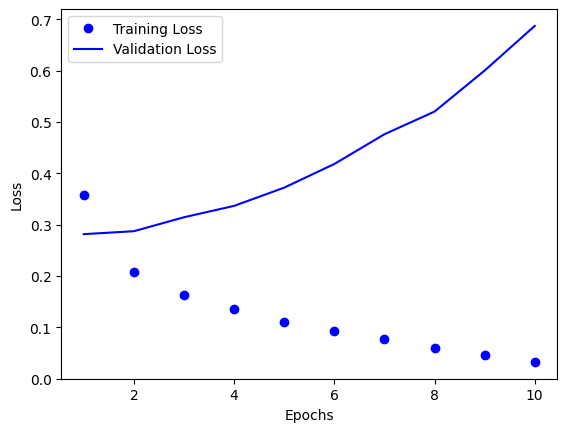

In [99]:
import matplotlib.pyplot as plt

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

total_epochs = len(history_dict["accuracy"])
epochs = range(1, total_epochs+1)

plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

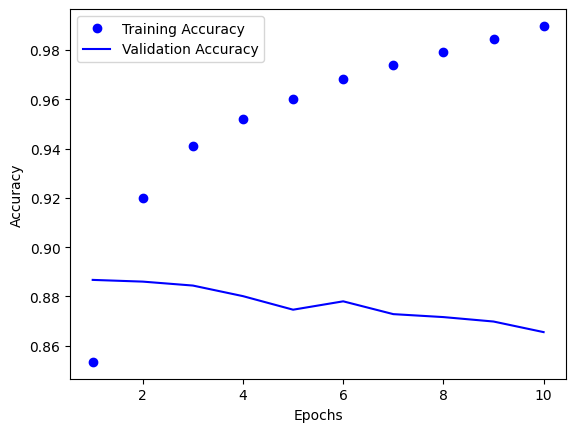

In [100]:
train_accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]

plt.plot(epochs, train_accuracy, 'bo', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model is performing better on training data than the validation data -> **Overfitting**

In [101]:
# On whole data

model.fit(x_train,
          y_train,
          epochs = 10,
          batch_size=256)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9425 - loss: 0.2198
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9565 - loss: 0.1407
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9667 - loss: 0.1114
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9742 - loss: 0.0890
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9802 - loss: 0.0714
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9846 - loss: 0.0568
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0447
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9914 - loss: 0.0342
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9941 - loss: 0.0262
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.0198


In [ ]:
model.evaluate(x_test, y_test) #Loss, Accuracy

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 0.8568 - loss: 0.7988


[0.7988472580909729, 0.8568000197410583]

In [103]:
model.predict(x_test[0:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.00383599],
       [1.        ],
       [0.8744819 ],
       [0.9901084 ],
       [0.99965996]], dtype=float32)

# Regression

In [104]:
from keras.datasets import boston_housing

(train_features, train_labels), (test_features, test_labels) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [106]:
train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

# 404 Training samples and 102 testing samples with 13 features each

((404, 13), (404,), (102, 13), (102,))

One issue with numerical features is that with a large range of data values, makes the model difficult to learn even though it might adapt to the data. Normalization helps in this case. 

In [111]:
train_features.mean(axis=0)

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [112]:
mean = train_features.mean(axis=0)
train_features = train_features - mean 
std = train_features.std(axis = 0)
train_features = train_features/std 

test_features = test_features - mean 
test_features = test_features/std 

# Overfitting Reduction Tips

* Smaller models have less overfitting generally. More parameters leads to more memorization or capacity, so keep on adding layers and validating the model till we come to a point of diminishing returns. 
* Simpler models are less likely to overfit than complex ones
* Forcing the weights of network to only take small values which makes the distribution of weight values more regular -> Constraints on complexity of the network. ->L1 and L2 Regularization
* Dropout -> Randomly dropping out a number of output features during training -> Setting to zero